# Importing all required libraries

In [1]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.7 MB/s eta 0:00:00


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


 # 1. Load Dataset

In [6]:
df_pm = pd.read_csv('/content/drive/MyDrive/Project Predictive Maintenance/ai4i2020.csv')
df_pm

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [ ]:
print(df_pm.shape)

(10000, 14)


In [ ]:
print(df_pm.head())

   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0  

In [ ]:
print(df_pm.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [ ]:
print(df_pm.isnull().sum())

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64


# 2. EDA (Exploratory Data Analysis)

In [ ]:
print(df_pm.describe())
print(df_pm['Machine failure'].value_counts(normalize=True))

               UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]  Machine failure  \
count            10000.000000  10000.000000     10000.000000     10000.000000   
mean              1538.776100     39.986910       107.951000         0.033900   
std                179.284096      9.968934        63.654147         0.180981   
min               1168.000000      3.800000         0.000000   

In [ ]:
df_pm['Machine failure'].value_counts()

,count
Machine failure,
0,9661
1,339


Text(0.5, 1.0, 'Class Distribution')

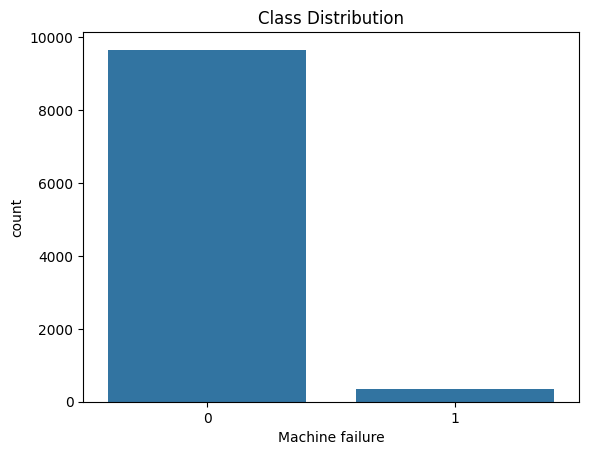

In [ ]:
# Target class distribution
sns.countplot(x='Machine failure', data=df_pm)
plt.title('Class Distribution')

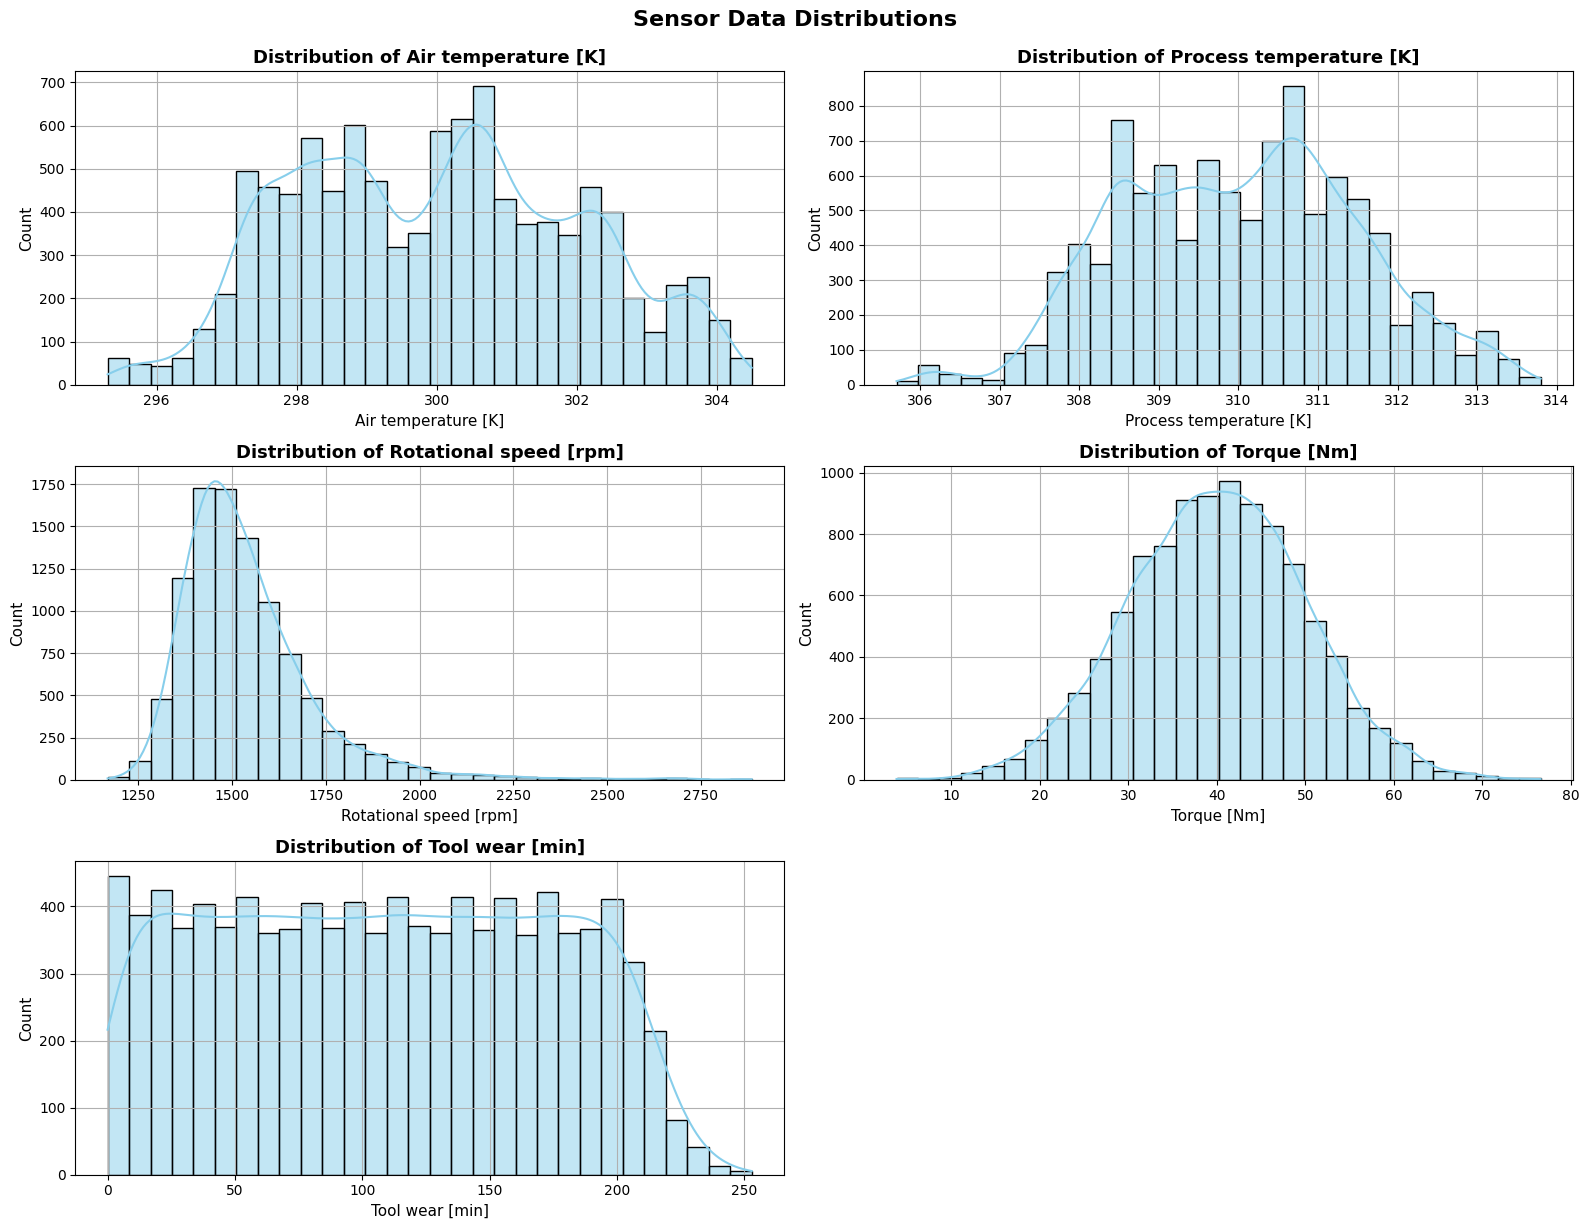

In [ ]:
# Define list of continuous sensor-based features
numeric_cols = ['Air temperature [K]', 'Process temperature [K]',
                'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

# Create subplot grid: 3 rows × 2 columns
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 12))
axes = axes.flatten()  # Flatten to simplify loop indexing

# Loop through features and plot histograms with KDE
for idx, col in enumerate(numeric_cols):
    sns.histplot(data=df_pm, x=col, kde=True, bins=30, ax=axes[idx], color='skyblue', edgecolor='black')
    axes[idx].set_title(f'Distribution of {col}', fontsize=13, fontweight='bold')
    axes[idx].set_xlabel(col, fontsize=11)
    axes[idx].set_ylabel('Count', fontsize=11)
    axes[idx].grid(True)

# Remove any unused subplot (in this case, the last one)
if len(numeric_cols) < len(axes):
    for j in range(len(numeric_cols), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Sensor Data Distributions', fontsize=16, fontweight='bold', y=1.02)
plt.show()

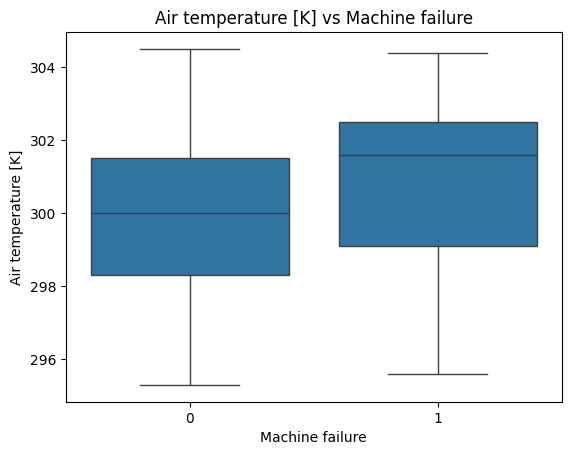

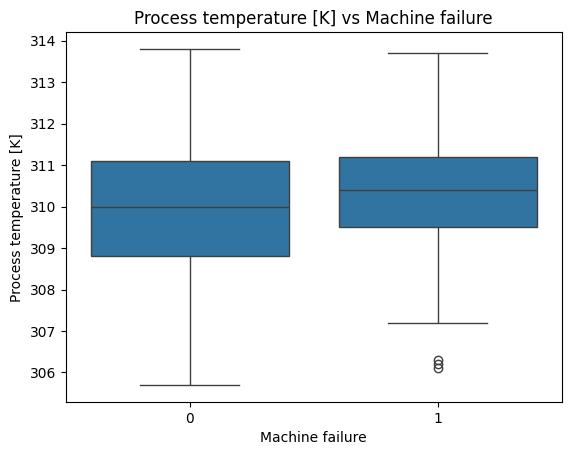

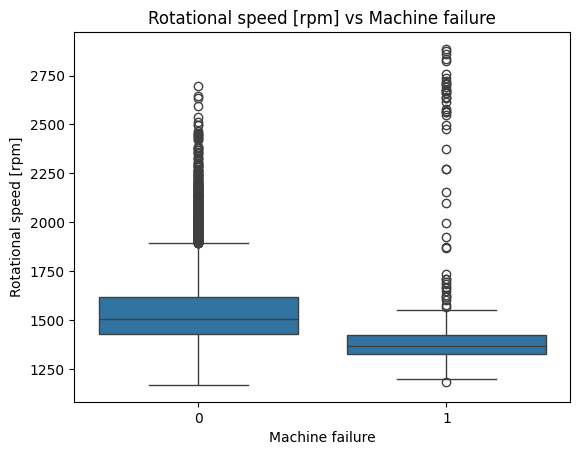

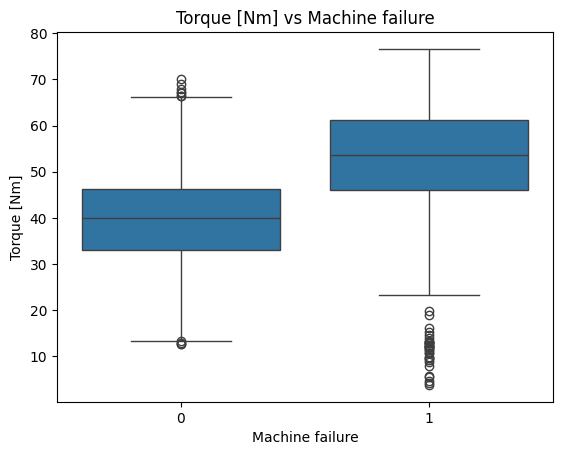

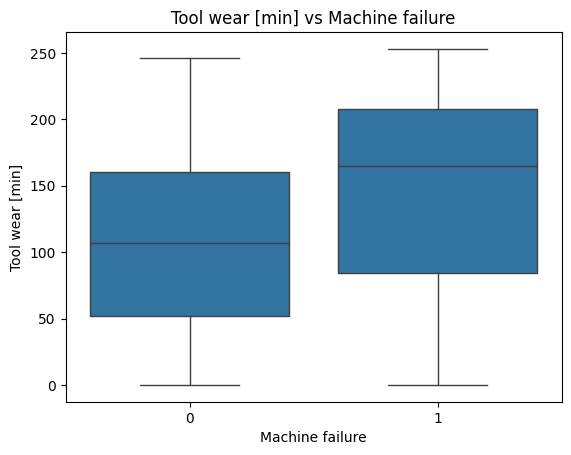

In [ ]:
# Feature-wise comparison with target
for col in ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']:
    plt.figure()
    sns.boxplot(x='Machine failure', y=col, data=df_pm)
    plt.title(f'{col} vs Machine failure')

# 3. Preprocessing

In [ ]:
# Function to filter outliers based on IQR for a given feature
def filter_outliers_iqr(df, feature_name):
    q1 = df[feature_name].quantile(0.25)
    q3 = df[feature_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return df[(df[feature_name] >= lower_bound) & (df[feature_name] <= upper_bound)]

# Apply outlier filtering on selected numerical features
df_pm = filter_outliers_iqr(df_pm, 'Rotational speed [rpm]')
df_pm = filter_outliers_iqr(df_pm, 'Torque [Nm]')

# Show new dataset shape after removing outliers
print("Shape after IQR-based outlier removal:", df_pm.shape)

Shape after IQR-based outlier removal: (9535, 14)


In [ ]:
df_pm['Machine failure'].value_counts()

,count
Machine failure,
0,9272
1,263


In [ ]:
df_pm

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [ ]:
# Encode 'Type' categorical feature using LabelEncoder
encoder = LabelEncoder()
df_pm['Type'] = encoder.fit_transform(df_pm['Type'])

# Define the target column and prepare features
target_col = 'Machine failure'
X_pm = df_pm.drop(columns=['UDI', 'Product ID', target_col])  # Drop non-feature columns
y_pm = df_pm[target_col]

# Scale features to a normalized range [0, 1]
scaler = MinMaxScaler()
X_scaled_pm = scaler.fit_transform(X_pm)

# Reduce feature dimensions using PCA
pca = PCA(n_components=5)
X_pca_pm = pca.fit_transform(X_scaled_pm)

# Balance the classes using SMOTE (Synthetic Minority Over-sampling Technique)
sm = SMOTE()
X_final, y_final = sm.fit_resample(X_pca_pm, y_pm)

In [ ]:
y_final.value_counts()

,count
Machine failure,
0,9272
1,9272


In [ ]:
# Splitting dataset into training and testing sets
X_train_pm, X_test_pm, y_train_pm, y_test_pm = train_test_split(X_final, y_final, test_size=0.3)

# Model Implementation

In [ ]:
def evaluate_classification_model(y_true, y_pred, model_label):
    """
    Display classification metrics and visualize the confusion matrix.

    Parameters:
    - y_true: Ground truth labels
    - y_pred: Predicted labels from the model
    - model_label: A string representing the model's name
    """
    # Generate the confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)

    # Display classification report
    print(f"\n📋 Classification Report for {model_label}:\n")
    print(classification_report(y_true, y_pred, target_names=['No Failure', 'Failure']))

    # Visualize confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Failure', 'Failure'],
                yticklabels=['No Failure', 'Failure'])

    plt.title(f'🔍 Confusion Matrix - {model_label}', fontsize=13)
    plt.xlabel('Predicted Labels', fontsize=11)
    plt.ylabel('True Labels', fontsize=11)
    plt.tight_layout()
    plt.show()

## XGBClassifier

In [ ]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train_pm, y_train_pm)
y_pred_xgb = xgb_model.predict(X_test_pm)


📋 Classification Report for XGBoost:

              precision    recall  f1-score   support

  No Failure       0.99      0.97      0.98      2811
     Failure       0.97      0.99      0.98      2753

    accuracy                           0.98      5564
   macro avg       0.98      0.98      0.98      5564
weighted avg       0.98      0.98      0.98      5564



/tmp/ipython-input-563729948.py:26: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


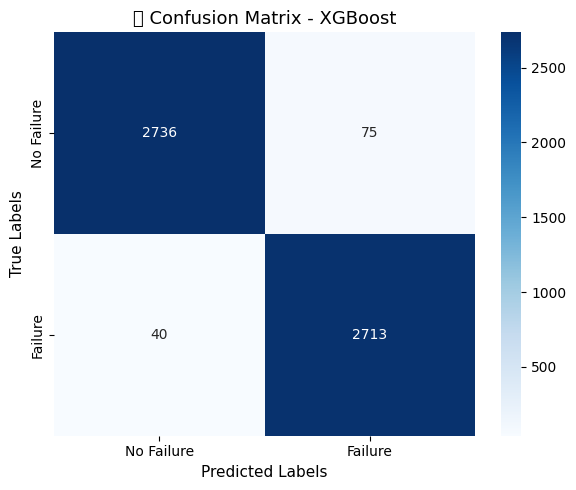

In [ ]:
evaluate_classification_model(y_test_pm, y_pred_xgb, "XGBoost")

## CatBoostClassifier

In [ ]:
cat_model = CatBoostClassifier(verbose=0)
cat_model.fit(X_train_pm, y_train_pm)
y_pred_cat = cat_model.predict(X_test_pm)


📋 Classification Report for CatBoost:

              precision    recall  f1-score   support

  No Failure       0.99      0.98      0.98      2811
     Failure       0.98      0.99      0.98      2753

    accuracy                           0.98      5564
   macro avg       0.98      0.98      0.98      5564
weighted avg       0.98      0.98      0.98      5564



/tmp/ipython-input-563729948.py:26: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


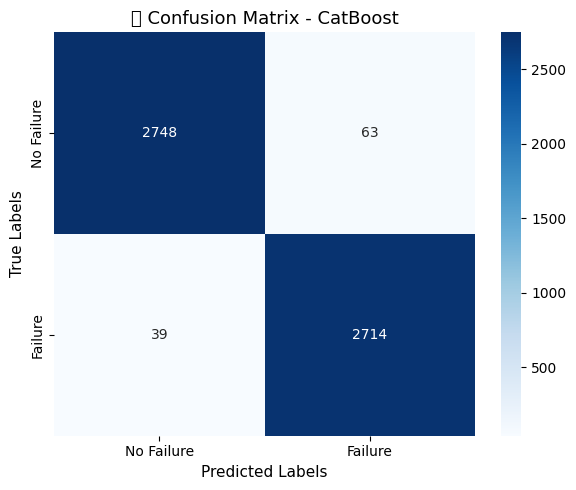

In [ ]:
evaluate_classification_model(y_test_pm, y_pred_cat, "CatBoost")

## LGBMClassifier

In [ ]:
lgbm_model = LGBMClassifier()
lgbm_model.fit(X_train_pm, y_train_pm)
y_pred_lgbm = lgbm_model.predict(X_test_pm)

[LightGBM] [Info] Number of positive: 6519, number of negative: 6461
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001322 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 12980, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502234 -> initscore=0.008937
[LightGBM] [Info] Start training from score 0.008937


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



📋 Classification Report for LightGBM:

              precision    recall  f1-score   support

  No Failure       0.99      0.97      0.98      2811
     Failure       0.97      0.99      0.98      2753

    accuracy                           0.98      5564
   macro avg       0.98      0.98      0.98      5564
weighted avg       0.98      0.98      0.98      5564



/tmp/ipython-input-563729948.py:26: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


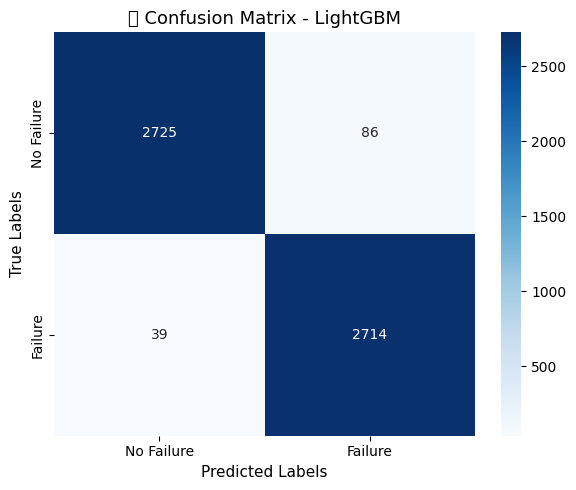

In [ ]:
evaluate_classification_model(y_test_pm, y_pred_lgbm, "LightGBM")

## MLPClassifier

In [ ]:
# Configure a deeper MLP with regularization and early stopping
mlp_model = MLPClassifier(
    hidden_layer_sizes=(128, 64, 32),  # 3 hidden layers with decreasing neurons
    activation='relu',                 # ReLU activation function
    solver='adam',                     # Optimized gradient descent
    alpha=0.0005,                      # L2 regularization (to avoid overfitting)
    learning_rate='adaptive',         # Learning rate changes when model plateaus
    max_iter=500,                     # Increase max iterations for convergence
    early_stopping=True,              # Stop if no improvement
    random_state=42
)

# Train the model
mlp_model.fit(X_train_pm, y_train_pm)

# Predict and evaluate
y_pred_mlp = mlp_model.predict(X_test_pm)

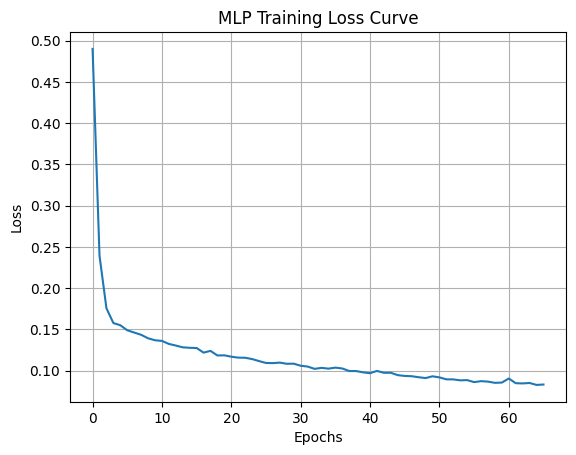

In [ ]:
# Plot training loss curve
plt.plot(mlp_model.loss_curve_)
plt.title("MLP Training Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

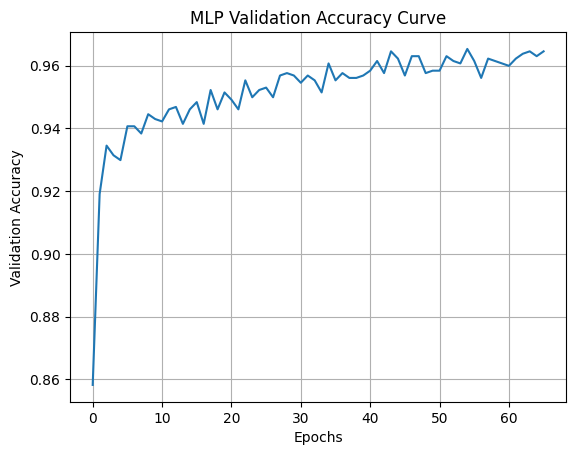

In [ ]:
plt.plot(mlp_model.validation_scores_)
plt.title("MLP Validation Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.grid(True)
plt.show()


📋 Classification Report for MLP Classifier:

              precision    recall  f1-score   support

  No Failure       0.98      0.95      0.96      2761
     Failure       0.95      0.98      0.97      2803

    accuracy                           0.96      5564
   macro avg       0.96      0.96      0.96      5564
weighted avg       0.96      0.96      0.96      5564



/tmp/ipython-input-563729948.py:26: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


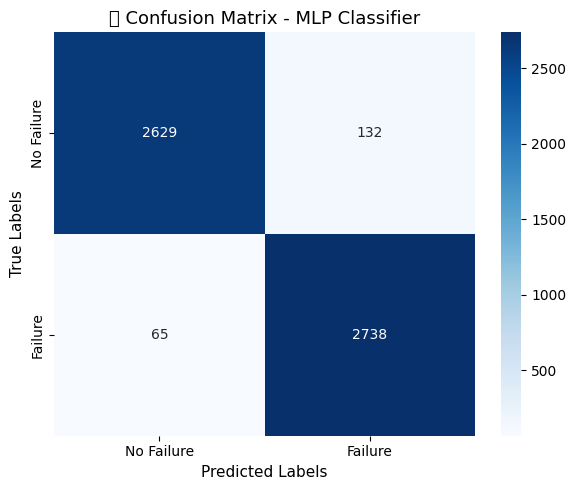

In [ ]:
evaluate_classification_model(y_test_pm, y_pred_mlp, "MLP Classifier")

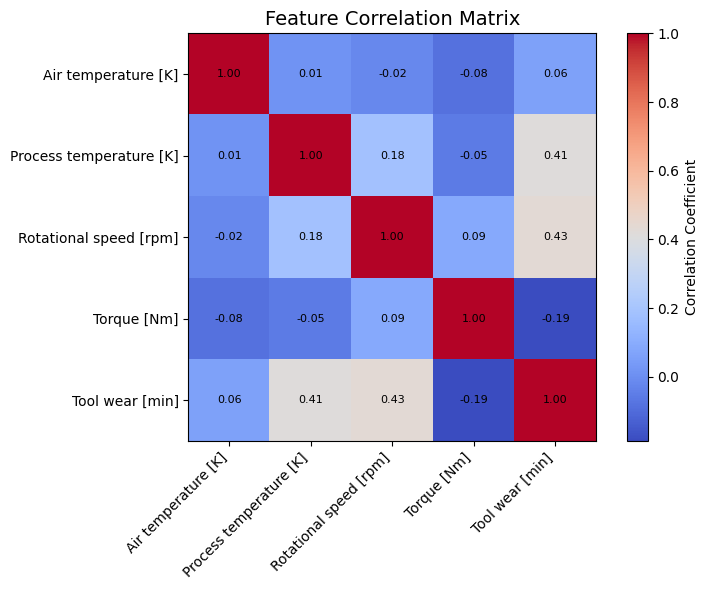

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Feature names
feature_names = ["Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]",
                 "Torque [Nm]", "Tool wear [min]"]

# Convert training data to DataFrame
X_train_df = pd.DataFrame(X_train_pm, columns=feature_names)

# Compute correlation matrix
corr_matrix = X_train_df.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
plt.imshow(corr_matrix, cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="Correlation Coefficient")
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=45, ha="right")
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.title("Feature Correlation Matrix", fontsize=14)

# Add correlation values inside heatmap
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        plt.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}",
                 ha="center", va="center", color="black", fontsize=8)

plt.tight_layout()
plt.show()